# Logistic Regression

This notebook will go through a vectorized implementation of Logistic Regression, as well as implementing Regularization within the model, and feature mapping.

## Logistic Regression with Vectorized Gradient Descent

### Logistic Regression

In logistic regression, we are concerned with binary classification. That is to say we can use logistic regression to classify a dataset as a *member* of a class, or *not a member*. For example, we can classify whether a series of exam scores accumulated to an overall 'pass' or 'fail', or whether a microchip was deemed 'working' or 'not working' given a set of parameters (features) describing it.

We formalize logistic regression with the equation below. Here $h_{\theta}(x)$ is our hypothesis, or 'guess' as to which of the two classes a dataset falls into. $x^{(i,j)}$ is our $i^{th}$ datapoint for the $j^{th}$ feature and $\theta^{(j)}$ is the weight pertaining to that feature.

\begin{equation*}
h_{\theta}(x^{(i)}) = \sum_{j=1}^{n} g( \theta^{(j)} x^{(i,j)})
\end{equation*}
Where the function $g$ is the sigmoid function defined below.
\begin{equation*}
g(z) = \frac{1}{1 + e^{-z}}
\end{equation*}

### Cost Function
The cost function $J(\theta)$, which is a measure of how accurate or inaccurate our model is, is defined below.
Here $x^{(i)}$ is our $i^{th}$ dataset, $y^{(i)}$ is the binary label of the $i^{th}$ dataset, and $m$ is the number of datasets.

\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^m \Bigl( -y^{(i)} \log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)})) \Bigr)
\end{equation*}

### Gradient
The gradient $\nabla J(\theta)$ of the cost function is defined as:

\begin{equation*}
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}
\end{equation*}

### Gradient Descent
In gradient descent, we seek to decrease the cost function $J(\theta)$ by subtracting the gradient (multiplied by some learning rate $\alpha$) from $\theta$. Formally this is represented in the equation below.

With a given weight $\theta_{j}$ for a feature $j$, a step in the negative gradient direction is given by:

\begin{equation*}
\theta_{j} = \theta_{j} - \alpha \nabla J(\theta)
\end{equation*}

### Vectorization
The above equations can be vectorized in order to efficiently implement them in code. The cost function $J$ in a vectorized form is:

\begin{equation*}
J = \frac{1}{m} \Bigl( -Y_{(1,m)}^{T}\log{(H_{(m,1)})}-(1-Y_{(m,1)})^{T}\log{(1-H_{(m,1)})}\Bigr)
\end{equation*}

Where the vectorized hypothesis is defined as:

\begin{equation*}
H_{(m,1)} = g(X_{(m,n)} \cdot \theta_{(n,1)})
\end{equation*}

The gradient $\nabla J$ in a vectorized form becomes:

\begin{equation*}
\nabla J_{(n,1)} = \frac{1}{m} X_{(n,m)}^{T}(H_{(m,1)}-Y_{(m,1)})
\end{equation*}

Whilst a step of gradient descent is:

\begin{equation*}
\theta_{(n,1)} = \theta_{(n,1)} - \alpha \nabla J_{(n,1)}
\end{equation*}

- $X_{(m,n)}$ is the matrix representing the $n$ features for all datapoints $m$.
- $\theta_{(n,1)}$ is the transpose of the matrix representing the weights for the $n$ features.
- $Y_{(m,1)}$ is the matrix representing the outputs for all datapoints $m$.

### Implementation
Below is the sigmoid function, vectorized cost function, and vectorized gradient descent implemented in python.

In [1]:
import numpy as np

def check_theta(theta, n):
    '''Ensure theta is an np.matrix and the right shape'''
    # Convert theta from numpy.ndarray to matrix
    if not isinstance(theta, np.matrix):
        theta = np.asmatrix(theta)
        
    # Ensure theta has the correct dimensions
    if theta.shape != (n, 1):
        theta = theta.reshape((n, 1))
    
    return theta

def sigmoid(z):
    '''Calculates the sigmoid for a given array'''
    return (1 / (1 + np.exp(-z)))

def cost(theta, X, Y):
    '''Calculate cost of logistic regression weight
    
    Args:
        theta (np.ndarray): weights for logistic regression of size n
        X (np.matrix): (m,n) matrix containing dataset
        Y (np.matrix): (m,1) matrix containing labelled outputs for dataset X
        
    Returns:
        J (float): Cost
    '''
    # Dataset size
    m, n = X.shape

    # Check theta
    theta = check_theta(theta, n)

    # Get hypothesis
    H = sigmoid(np.dot(X, theta))
    
    # Calculate cost
    first = np.dot(-Y.T, np.log(H))
    second = np.dot((1-Y).T, np.log(1-H))
    
    J = (1/m)*(first - second)

    return J.item()

def gradient(theta, X, Y):
    '''Calculates the gradient for a given theta
    
    theta (np.ndarray): weights for logistic regression of size n
        X (np.matrix): (m,n) matrix containing dataset
        Y (np.matrix): (m,1) matrix containing labelled outputs for dataset X
        
    Returns:
        J (np.matrix): (n,1) matrix containing gradients of theta
    '''
    # Dataset size
    m, n = X.shape
    
    # Check theta
    theta = check_theta(theta, n)
        
    # Get hypothesis
    H = sigmoid(np.dot(X, theta))

    # Calculate gradient
    grad = (1/m) * np.dot(X.T, H-Y)

    return grad

def gradient_descent(X, Y, cost_func, alpha, delta=0.000001, max_iter=5000, initial_theta=None, **cost_kwargs):
    '''Vectorized Gradient Descent
    
    Args:
        X (np.matrix): (m,n) matrix containing dataset
        Y (np.matrix): (m,1) matrix containing labelled outputs for dataset X
        alpha (float): Learning rate
        cost_func (function): function used to calculate the cost of the model.
        delta (float): Convergence value to stop at, when difference between last and second to
            last cost is smaller than this, it is considered converged.
        max_iter (int): Maximum number of iterations to run through gradient descent for
        theta (np.matrix): (n,1) Starting theta (can be omitted and will initialize zeros)
        cost_kwargs (Dict): Additional key-word arguments to be passed to the cost_func
        
    Returns:
        J_vals (List[float]): List of costs for each iteration
        theta_vals (List[np.matrix]): List of theta values for each iteration
    '''
    # Initialize lists to store iteration results
    theta_vals = []
    J_vals = []

    m, n = X.shape
    
    # Initialize theta
    if initial_theta is None:
        theta = np.zeros((n,1))
        theta = np.asmatrix(theta)
    else:
        theta = check_theta(initial_theta, n)

    theta_vals.append(theta)
    J_vals.append(cost_func(theta, X, Y, **cost_kwargs))

    # Start iterations
    for idx in range(1,max_iter):
        theta = theta - (alpha * gradient(theta, X, Y))

        J_vals.append(cost_func(theta, X, Y, **cost_kwargs))
        theta_vals.append(theta)
        
        if (J_vals[-2] - J_vals[-1]) < delta:
            print('Difference is smaller than {} after {} iterations, stopping.'.format(delta, idx))
            print('Final cost: {:.3f}'.format(J_vals[-1]))
            return J_vals, theta_vals
        
    print('Maximum iteration reached: {}'.format(max_iter))
    print('Final cost: {:.3f}'.format(J_vals[-1]))
    
    return J_vals, theta_vals

### Example

Now that we have defined our functions, let's import some data and use these functions to classify our data with a decision boundary. 

#### Exam Scores
First let's plot the data.

Below we are looking the overall pass/fail rate of students given two of their exam scores. The Datapoints marked in a yellow circle have failed, whilst the black crosses have passed.

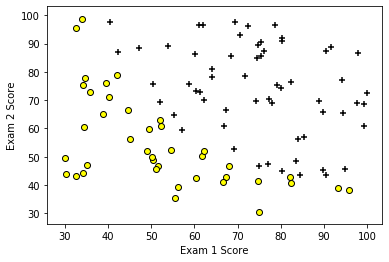

In [2]:
import pandas as pd

from plotting.logistic_regression import plot_data
%matplotlib inline

df = pd.read_csv('data/ex2data1.txt',delimiter=',',
                 header=None,
                 names=['Exam Score 1','Exam Score 2','Pass or Fail'])

plot_data(df)

#### Run
Now let's run gradient descent on this dataset. 

First we should move our data into appropriate data structures, as well as adding a bias feature $\theta_{0}$.

In [3]:
X = np.asmatrix(df[['Exam Score 1', 'Exam Score 2']].to_numpy())
X = np.hstack((np.ones((len(X),1)), X))
m,n = X.shape
Y = np.asmatrix(df['Pass or Fail'].to_numpy()).T

We can now test our implementation, let's start by calculating the cost of some initial $\theta$.

In [4]:
# Initialize theta
theta = np.zeros(n)
# Calculate the cost and the gradient
J = cost(theta, X, Y)
grad = gradient(theta, X, Y)
print('The cost of a theta {0} is: {1:.3f}'.format(theta,J))
print('The gradient at this point is: \n{0}\n'.format(grad))

theta = np.array([-24, 0.2, 0.2])
J = cost(theta, X, Y)
grad = gradient(theta, X, Y)
print('The cost of a theta {0} is: {1:.3f}'.format(theta,J))
print('The gradient at this point is: \n{0}\n'.format(grad))

The cost of a theta [0. 0. 0.] is: 0.693
The gradient at this point is: 
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

The cost of a theta [-24.    0.2   0.2] is: 0.218
The gradient at this point is: 
[[0.04290299]
 [2.56623412]
 [2.64679737]]



Now let's try a Gradient Descent implementation. Note that starting with a $\theta$ of zeros will not converge to the best linear fit. Let's start with something closer to an optimal value.



Difference is smaller than 1e-06 after 146 iterations, stopping.
Final cost: 0.204


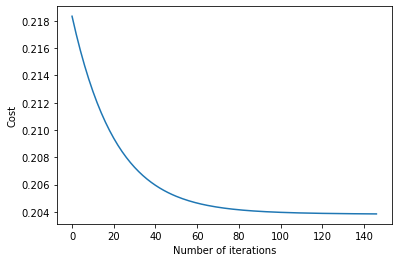

In [5]:
from plotting.logistic_regression import plot_cost_function

# Set initial parameters
alpha = 0.00005
theta = np.array([-24,0.2,0.2])

# Run
J_vals, theta_vals = gradient_descent(X, Y, cost, alpha, initial_theta=theta)

# Plot
plot_cost_function(J_vals)

Now let's define a function to plot what this optimal value of theta looks like as a decision boundary on the data.

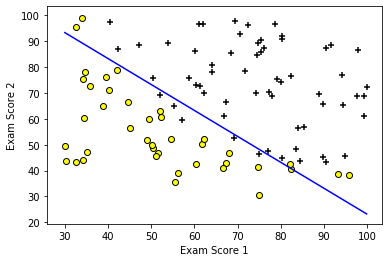

In [6]:
from plotting.logistic_regression import plot_best_fit

plot_best_fit(df, theta_vals[-1])

Not too bad for a linear fit.

### Predict

Now we can use the model to make a prediction, and in turn test how well our model performs in the training dataset.

In [7]:
def get_accuracy(X, Y, theta):
    '''Gets accuracy of model on training dataset
    
    Args:
        X (np.matrix): (m,n) training dataset
        Y (np.matrix): (m,1) labels for dataset
        theta (np.matrix): (n,1) weights of model
    '''
    # Get data sizes
    m, n = X.shape
    
    # Check theta
    theta = check_theta(theta, n)
    
    # Get predictions
    prob = sigmoid(np.dot(X, theta))
    predictions = [1 if x >= 0.5 else 0 for x in prob]
    
    # Get accuracy
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
    accuracy = (sum(correct) / len(Y)) * 100
    print('accuracy = {:.2f}%'.format(accuracy))
    
get_accuracy(X, Y, theta_vals[-1])

accuracy = 90.00%


## Logistic Regression with Regularization

For more complex, non-linear, datasets it is clear that a linear decision boundary will not be the most optimal solution. To implement a better solution we can use additional polynomial terms for features within $X$. We must be careful though, as adding too many polynomial terms will lead to overfitting. To prevent the overfitting problem we can include *regularization* within our model.

### Cost Function
The cost function with a regularization term $J_{reg}(\theta)$ is defined below, where $\lambda$ refers to some regularization constant and $J(\theta)$ refers to cost function previously defined.

Note here that the sum over the regularization term starts at 1, indicating that the $j=0$ term (the bias unit) does not need regularizing.

\begin{equation*}
J_{reg}(\theta) = J(\theta) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^{2}
\end{equation*}

Similarly as before, we can *vectorize* this equation so it can be impleneted efficiently in code, below is the vectorized form.

\begin{equation*}
J_{reg} = J + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^{2}
\end{equation*}


### Gradient 
The gradient for $j = 0$ is unchanged from the non-regularized cost function, however for $j \geq 1$ the gradient becomes:

\begin{equation*}
\nabla J(\theta) = \Bigl( \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)} \Bigr) + \frac{\lambda}{m} \theta_{j}
\end{equation*}

In a vectorized form is:

\begin{equation*}
\nabla J_{(n,1)} = \frac{1}{m} X_{(n,m)}^{T}(H_{(m,1)}-Y_{(m,1)}) + \frac{\lambda}{m} \theta_{(n,1)}
\end{equation*}

**N.B.** Here the 0th element of $\theta$ should not be included in the regularization.

### Implementation
Below is the reguarlized cost and gradient implemented in python.

In [8]:
def cost_reg(theta, X, Y, lmbda):
    '''Calculate regularized cost of logistic regression weight
    
    Args:
        theta (np.ndarray): weights for logistic regression of size n
        X (np.matrix): (m,n) matrix containing dataset
        Y (np.matrix): (m,1) matrix containing labelled outputs for dataset X
        lmbda (float): Regularization term
        
    Returns:
        J (float): Cost
    '''
    # Get data sizes
    m, n = X.shape
    
    # Check theta
    theta = check_theta(theta, n)
    
    # Get hypothesis
    H = sigmoid(np.dot(X, theta))
    
    # Calculate cost
    first = np.dot(-Y.T, np.log(H))
    second = np.dot((1-Y).T, np.log(1-H))
    reg = (lmbda / (2*m)) * (np.sum(np.square(theta[:,1:n])))
    
    J = (1/m)*(first - second) + reg

    return J.item()
    
def gradient_reg(theta, X, Y, lmbda):
    '''Calculates the regularized gradient for a given theta
    
    theta (np.ndarray): weights for logistic regression of size n
        X (np.matrix): (m,n) matrix containing dataset
        Y (np.matrix): (m,1) matrix containing labelled outputs for dataset X
        lmbda (float): Regularization term
        
    Returns:
        J (np.matrix): (n,1) matrix containing gradients of theta
    
    '''
    # Get data sizes
    m, n = X.shape
    
    # Check theta
    theta = check_theta(theta, n)
    
    # Get hypothesis
    H = sigmoid(np.dot(X, theta))

    # Get regularized term
    reg = (lmbda / m) * (theta.T)
    
    # Calculate gradient 
    grad = (1/m) * np.dot(X.T, H-Y) + reg
    
    # Remove regularization from theta 0
    grad[0,0] = grad[0,0] - reg[0,0]

    return grad

### Example
We can now test our regularized implementation. 

#### Microchip Manufacturer
In this dataset we are determining whether a manufactured microchip gets accepted or rejected based on two independent tests.

By visualizing the data we can see that we cannot use a linear fit to model the decision boundary for this data.

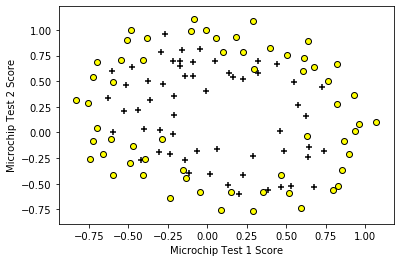

In [9]:
from plotting.logistic_regression import plot_microchip_data

df = pd.read_csv('data/ex2data2.txt',
                 delimiter=',',
                 header=None,
                 names=['Microchip Test 1','Microchip Test 2','Accept or Reject'])

plot_microchip_data(df)

## Feature Mapping
In the above dataset we clearly need to fit a non-linear function, with respect to the features, in order to calculate a reasonable decision boundary. To do this we can create more features by a technique known as *feature mapping*, ie including polynomial terms of the features within our model. Let's create a function that will take our features and map all polynomials upto some nth power.

In [10]:
def map_features(X, degree):
    '''Calculates polynomial features given a dataset
    
    Args:
        X (np.matrix): (m,n) training dataset
        degree (n): polynomial degree.
    
    Returns:
        X_p (np.matrix): training dataset with additional polynomial features
    '''
    X_p = np.matrix(np.ones(len(X))).T
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x = np.multiply(np.power(X[:,0], i-j),np.power(X[:,1], j))
            X_p = np.append(X_p, x, axis=1)
    return X_p

Now let's test our implementation.

In [11]:
# First get the variables into matrix form
X = np.asmatrix(df[['Microchip Test 1','Microchip Test 2']].to_numpy())
Y = np.asmatrix(df['Accept or Reject'].to_numpy()).T

# Now map X onto 6 degrees of polynomial
X = map_features(X, 6)

# Add the bias unit
X = np.hstack((np.ones((len(X),1)), X))
m,n = X.shape

# Let's initialize theta
theta = np.zeros(n)

print('Our initial cost is {0:.3f}'.format(cost_reg(theta, X, Y, 1)))

Our initial cost is 0.693


We can use the scipy optimization code from earlier to find an optimal decision boundary.

In [12]:
J_vals, theta_vals = gradient_descent(X, Y, cost_reg, 0.01, max_iter=10000, lmbda=1)

Maximum iteration reached: 10000
Final cost: 0.448


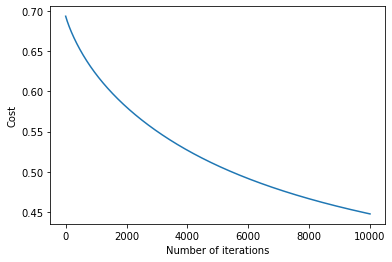

accuracy = 83.05%


In [13]:
plot_cost_function(J_vals)

get_accuracy(X, Y, theta_vals[-1])

Not bad considering the complexity of the data, Now let's plot the decision boundary to see how well the line fits the data.

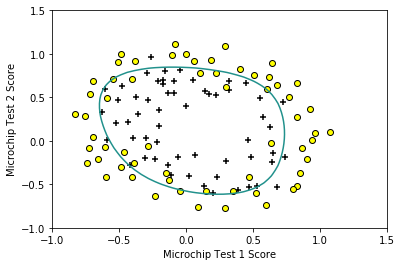

In [14]:
from plotting.logistic_regression import plot_contour

plot_contour(theta_vals[-1], df)